# Pair Programming- Justin and Nuri
#### Trying to find correlation between month and worldwide Gross

##### Import statements

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3

#### Reading relevant tables

In [11]:
tn_budgets = pd.read_csv("../../data/zippedData/tn.movie_budgets.csv.gz")
tn_budgets.head(10)


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,"$306,000,000","$936,662,225","$2,053,311,220"
6,7,"Apr 27, 2018",Avengers: Infinity War,"$300,000,000","$678,815,482","$2,048,134,200"
7,8,"May 24, 2007",Pirates of the Caribbean: At Worldâs End,"$300,000,000","$309,420,425","$963,420,425"
8,9,"Nov 17, 2017",Justice League,"$300,000,000","$229,024,295","$655,945,209"
9,10,"Nov 6, 2015",Spectre,"$300,000,000","$200,074,175","$879,620,923"


In [12]:
# change release_date column from str to datetime 
tn_budgets['release_date'] = pd.to_datetime(tn_budgets['release_date'])
# cleaning data to get rid of unwanted characters for analysis
tn_budgets['production_budget'] = tn_budgets['production_budget'].str.replace('$','')
tn_budgets['production_budget'] = tn_budgets['production_budget'].str.replace(',','')
tn_budgets = tn_budgets.astype({'production_budget': 'int64'})
tn_budgets['domestic_gross'] = tn_budgets['domestic_gross'].str.replace('$','')
tn_budgets['domestic_gross'] = tn_budgets['domestic_gross'].str.replace(',','')
tn_budgets = tn_budgets.astype({'domestic_gross': 'int64'})
tn_budgets['worldwide_gross'] = tn_budgets['worldwide_gross'].str.replace('$','')
tn_budgets['worldwide_gross'] = tn_budgets['worldwide_gross'].str.replace(',','')
tn_budgets = tn_budgets.astype({'worldwide_gross': 'int64'})
tn_budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 5782 non-null   int64         
 1   release_date       5782 non-null   datetime64[ns]
 2   movie              5782 non-null   object        
 3   production_budget  5782 non-null   int64         
 4   domestic_gross     5782 non-null   int64         
 5   worldwide_gross    5782 non-null   int64         
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 271.2+ KB


In [13]:
# tn_budgets["release_date"].corr(tn_budgets["worldwide_gross"])
tn_budgets["release_month"] = tn_budgets["release_date"].dt.month 

# tn_budgets["season"] = tn_budgets['release_month'].apply( lambda x: 'Winter' if (x == 12 | x <= 2) elif (x >=3 | x <=5): x == 'Spring' else None )
# df[ ‘Result’ ] = df[ ‘Maths’ ].apply( lambda x: ‘Pass’ if x>=5 else ‘Fail’ )



In [14]:
# tn_budgets["release_month"].corr(tn_budgets["worldwide_gross"])
tn_budgets["worldwide_gross"].mean()
by_month = tn_budgets.groupby("release_month")["worldwide_gross"].mean()



## Map average gross revenue by month

<AxesSubplot:title={'center':'AVG Gross Per Month'}, xlabel='Months', ylabel='Mean Gross'>

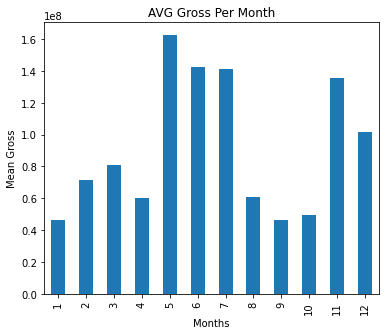

In [15]:
by_month.plot(kind='bar', title='AVG Gross Per Month', ylabel='Mean Gross',
         xlabel='Months', figsize=(6, 5))

In [17]:
def month_to_season(month):
    season_month = {
            "12":'Winter', "1":'Winter', "2":'Winter',
            "3":'Spring', "4":'Spring', "5":'Spring',
            "6":'Summer', "7":'Summer', "8":'Summer',
            "9":'Autumn', "10":'Autumn', "11":'Autumn'}
    return season_month.get(month)
month_to_season("12")

season_list = []

for month in tn_budgets['release_month']:
    season_list.append(season)
    
df['Season'] = season_list

'Winter'